In [259]:
# Utilizamos numpy para generar datos sinteticos para saber que sucede con nuestro modelo
from turtle import xcor
import numpy as np
import pandas as pd  # Utilizamos pandas para el manejo de datos
# Utilizamos matplotlib para poder gráficar nuestra información
import matplotlib.pyplot as plt
from sklearn import preprocessing  # Y utilizamos el modulo de preprocesamiento
# Importamos el modulo de KNN porque vamos a utilizar un modelo de knn para poder lograr una solución
from sklearn.neighbors import KNeighborsClassifier

In [260]:
prospectos = pd.read_csv("datos_prestamo.csv" , index_col=False) #Cargamos el archivo CSV

In [261]:
prospectos #Imprimimos la tabla para ver la información

,Unnamed: 0,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,0,02/26/2019 11:00 AM,02/27/2019 12:03 PM,LP002519,Hombre,Si,3+,Graduado,No,4691,0.0,100.0,360.0,1.0,Semiurbana,Si,Dudley
1,1,02/27/2019 02:52 PM,02/26/2019 07:43 AM,LP001280,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,NaN,Semiurbana,Si,Pablo
2,2,02/27/2019 08:18 AM,02/28/2019 02:27 PM,LP001151,Mujer,No,0,Graduado,No,4000,2275.0,144.0,360.0,1.0,Semiurbana,Si,Dudley
3,3,02/28/2019 10:00 AM,03/01/2019 12:57 PM,LP002036,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,NaN,Urabana,Si,Ana
4,4,02/26/2019 07:40 AM,02/27/2019 04:35 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Regina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,552,02/27/2019 08:22 AM,02/28/2019 01:04 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Pablo
553,553,02/27/2019 10:40 AM,02/28/2019 01:10 PM,LP002315,Hombre,Si,1,Graduado,No,8300,0.0,152.0,300.0,0.0,Semiurbana,No,NaN
554,554,02/28/2019 10:32 AM,03/01/2019 02:20 PM,LP002225,Hombre,Si,2,Graduado,No,5391,0.0,130.0,360.0,1.0,Urabana,Si,Ana
555,555,02/26/2019 09:48 AM,02/27/2019 01:28 PM,LP002807,Hombre,Si,2,No Graduado,No,3675,242.0,108.0,360.0,1.0,Semiurbana,Si,Pablo


In [262]:
prospectos['Estatus_prestamo'].value_counts() #Vamos a mostrar de esa información cuantos tienen o no tienen el crédito aprobado

Si    440
No    117
Name: Estatus_prestamo, dtype: int64

array([[<AxesSubplot:title={'center':'Credito_pedido'}>]], dtype=object)

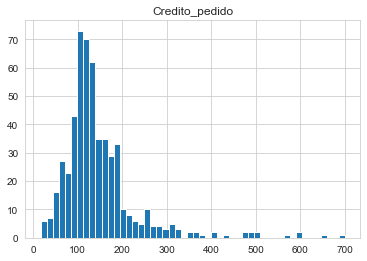

In [263]:
prospectos.hist(column='Credito_pedido', bins=50) #generamos una gráfica para ver cuanto es el monto que normalmente solicitan

In [264]:
prospectos.columns #Sacamos las columnas 

Index(['Unnamed: 0', 'Fecha_registro', 'Fecha_contacto', 'Id', 'Genero',
       'Casado', 'Dependientes', 'Educacion', 'Trabaja_para_el', 'Salario',
       'Salario_Pareja', 'Credito_pedido', 'Plazo_prestamo',
       'Historial_crediticio', 'Area_vivienda', 'Estatus_prestamo',
       'Asesor_asignado'],
      dtype='object')

In [265]:
x = prospectos[['Fecha_registro', 'Fecha_contacto', 'Id', 'Genero', 'Casado',
                'Dependientes', 'Educacion', 'Trabaja_para_el', 'Salario',
               'Salario_Pareja', 'Credito_pedido', 'Plazo_prestamo',
                'Historial_crediticio', 'Area_vivienda',
                'Asesor_asignado']] .values
print(x[0:5]) #mostramos los valores de los primeros 5

[['02/26/2019 11:00 AM' '02/27/2019 12:03 PM' 'LP002519' 'Hombre' 'Si'
  '3+' 'Graduado' 'No' 4691 0.0 100.0 360.0 1.0 'Semiurbana' 'Dudley']
 ['02/27/2019 02:52 PM' '02/26/2019 07:43 AM' 'LP001280' 'Hombre' 'Si'
  '2' 'No Graduado' 'No' 3333 2000.0 99.0 360.0 nan 'Semiurbana' 'Pablo']
 ['02/27/2019 08:18 AM' '02/28/2019 02:27 PM' 'LP001151' 'Mujer' 'No' '0'
  'Graduado' 'No' 4000 2275.0 144.0 360.0 1.0 'Semiurbana' 'Dudley']
 ['02/28/2019 10:00 AM' '03/01/2019 12:57 PM' 'LP002036' 'Hombre' 'Si'
  '0' 'Graduado' 'No' 2058 2134.0 88.0 360.0 nan 'Urabana' 'Ana']
 ['02/26/2019 07:40 AM' '02/27/2019 04:35 PM' 'LP002894' 'Mujer' 'Si' '0'
  'Graduado' 'No' 3166 0.0 36.0 360.0 1.0 'Semiurbana' 'Regina']]


In [266]:
y = prospectos['Estatus_prestamo'].values #Meramente por información mostramos los primeros 5 valores de la columna EstatusPrestamo
y[0:5]

array(['Si', 'Si', 'Si', 'Si', 'Si'], dtype=object)

In [267]:
categorias=prospectos.filter(['Genero', 'Casado','Educacion','Trabaja_para_el','Area_vivienda',
                'Asesor_asignado']) #Hacemos un filtro donde sacamos las variables que nos pueden ayudar a determinar si se otorga el crédito o no

In [268]:
categorias.head(10) #de ese filtro mostramos las primeros 10 datos en base a las variables

,Genero,Casado,Educacion,Trabaja_para_el,Area_vivienda,Asesor_asignado
0,Hombre,Si,Graduado,No,Semiurbana,Dudley
1,Hombre,Si,No Graduado,No,Semiurbana,Pablo
2,Mujer,No,Graduado,No,Semiurbana,Dudley
3,Hombre,Si,Graduado,No,Urabana,Ana
4,Mujer,Si,Graduado,No,Semiurbana,Regina
5,Mujer,Si,Graduado,No,Semiurbana,Pablo
6,Mujer,Si,Graduado,No,Semiurbana,Pablo
7,Hombre,Si,Graduado,No,Semiurbana,Ana
8,Hombre,No,Graduado,No,Rural,Pablo
9,Hombre,Si,No Graduado,No,Semiurbana,Regina


In [269]:
#Empezamos con la genero
categorias.iloc[:,0]

0      Hombre
1      Hombre
2       Mujer
3      Hombre
4       Mujer
        ...  
552     Mujer
553    Hombre
554    Hombre
555    Hombre
556    Hombre
Name: Genero, Length: 557, dtype: object

In [270]:
#Usar las función get_dummies para sexo
cat_numericaSex=pd.get_dummies(categorias.iloc[:,0], drop_first=False)

In [271]:
cat_numericaSex #Imprimos la variable ya que empezamos a normalizar la parte de genero

,Hombre,Mujer
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
552,0,1
553,1,0
554,1,0
555,1,0


In [272]:
#Usar las función get_dummies para estado civil
cat_numericaCiv=pd.get_dummies(categorias.iloc[:,1], prefix=['Casado'],drop_first=False)

In [273]:
cat_numericaCiv #Imprimos la variable ya que empezamos a normalizar la parte de Casado

,['Casado']_No,['Casado']_Si
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
552,0,1
553,0,1
554,0,1
555,0,1


In [274]:
#Usar las función get_dummies para educacion
cat_numericaEdu=pd.get_dummies(categorias.iloc[:,2], drop_first=False)

In [275]:
cat_numericaEdu #Imprimos la variable ya que empezamos a normalizar la parte de Educación

,Graduado,No Graduado
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
552,1,0
553,1,0
554,1,0
555,0,1


In [276]:
#Usar las función get_dummies para saber si es asalariado o tiene negocio propio
cat_numericaTra=pd.get_dummies(categorias.iloc[:,3],prefix=['NegocioPropio'],drop_first=False)

In [277]:
cat_numericaTra #Imprimos la variable ya que empezamos a normalizar la parte de asalariado o negocio propio

,['NegocioPropio']_No,['NegocioPropio']_Si
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
552,1,0
553,1,0
554,1,0
555,1,0


In [278]:
#Usar las función get_dummies para saber el área de vivienda
cat_numericaViv=pd.get_dummies(categorias.iloc[:,4], drop_first=False)

In [279]:
cat_numericaViv #Imprimos la variable ya que empezamos a normalizar la parte de área de vivienda

,Rural,Semiurbana,Urabana
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
552,0,1,0
553,0,1,0
554,0,0,1
555,0,1,0


In [280]:
#Usar las función get_dummies para saber el asesor
cat_numericaAs=pd.get_dummies(categorias.iloc[:,5], drop_first=False)

In [281]:
cat_numericaAs #Imprimos la variable ya que empezamos a normalizar la parte de Asesor

,Ana,Dudley,Pablo,Regina,Santiago
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
552,0,0,1,0,0
553,0,0,0,0,0
554,1,0,0,0,0
555,0,0,1,0,0


In [282]:
import time #Empezamos a trabajar en normalizar la parte de la fecha, esas fechas las convertimos en datos de tipo float

In [283]:

def toTimeStampReg(date):
  return time.mktime(time.strptime(date, '%m/%d/%Y %H:%M %p'))


cat_numericaFR=prospectos['Fecha_registro'].apply(toTimeStampReg)

cat_numericaFR

0      1.551200e+09
1      1.551258e+09
2      1.551277e+09
3      1.551370e+09
4      1.551188e+09
           ...     
552    1.551277e+09
553    1.551286e+09
554    1.551372e+09
555    1.551196e+09
556    1.551201e+09
Name: Fecha_registro, Length: 557, dtype: float64

In [284]:

def toTimeStampCont(date):
  return time.mktime(time.strptime(date, '%m/%d/%Y %H:%M %p'))


cat_numericaFC=prospectos['Fecha_contacto'].apply(toTimeStampCont)
cat_numericaFC

0      1.551291e+09
1      1.551189e+09
2      1.551342e+09
3      1.551467e+09
4      1.551264e+09
           ...     
552    1.551337e+09
553    1.551338e+09
554    1.551428e+09
555    1.551252e+09
556    1.551262e+09
Name: Fecha_contacto, Length: 557, dtype: float64

In [285]:
datosCompletos=pd.concat([cat_numericaFR,cat_numericaFC,cat_numericaSex,cat_numericaCiv,cat_numericaEdu,cat_numericaTra,cat_numericaViv,cat_numericaAs],axis=1) #unimos en una sola tabla lo que ya normalizamos para poderlo ver de manera uniforme

In [286]:
datosCompletos.head(10) #Imprimimos los primeros 10 

,Fecha_registro,Fecha_contacto,Hombre,Mujer,['Casado']_No,['Casado']_Si,Graduado,No Graduado,['NegocioPropio']_No,['NegocioPropio']_Si,Rural,Semiurbana,Urabana,Ana,Dudley,Pablo,Regina,Santiago
0,1.551200e+09,1.551291e+09,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0
1,1.551258e+09,1.551189e+09,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0
2,1.551277e+09,1.551342e+09,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,1.551370e+09,1.551467e+09,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0
4,1.551188e+09,1.551264e+09,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0
5,1.551276e+09,1.551379e+09,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0
6,1.551284e+09,1.551353e+09,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0
7,1.551372e+09,1.551426e+09,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0
8,1.551280e+09,1.551348e+09,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0
9,1.551279e+09,1.551347e+09,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0


In [287]:
datos=[[cat_numericaSex, cat_numericaCiv,cat_numericaEdu,cat_numericaTra,cat_numericaViv,cat_numericaAs]] #Estos son los datos que realmente nos interesan para poder determinar si se otorga o no el crédito

In [288]:
clase=prospectos["Estatus_prestamo"] #De prospectos lo que realmente me interesa es la parte de estatus_prestamo

In [289]:
escalador = preprocessing.MinMaxScaler() #Comenzamos el preprocesamiento de los datos para nuestro modelo

In [290]:
datos #imprimimos los datos, donde podemos ver que ya tenemos uniformidad

[[     Hombre  Mujer
  0         1      0
  1         1      0
  2         0      1
  3         1      0
  4         0      1
  ..      ...    ...
  552       0      1
  553       1      0
  554       1      0
  555       1      0
  556       1      0
  
  [557 rows x 2 columns],
       ['Casado']_No  ['Casado']_Si
  0                0              1
  1                0              1
  2                1              0
  3                0              1
  4                0              1
  ..             ...            ...
  552              0              1
  553              0              1
  554              0              1
  555              0              1
  556              1              0
  
  [557 rows x 2 columns],
       Graduado  No Graduado
  0           1            0
  1           0            1
  2           1            0
  3           1            0
  4           1            0
  ..        ...          ...
  552         1            0
  553         1           

In [291]:
escalador = preprocessing.MinMaxScaler()

In [292]:
datos=escalador.fit_transform(datosCompletos) #Aquí se ajustan los datos y los transforma en la misma escala

In [293]:
datos #imprimos esos datos que ya están en el mismo idioma

array([[0.05150215, 0.36669543, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25579399, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.32575107, 0.55306299, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.66351931, 0.86216566, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0360515 , 0.2297239 , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.05536481, 0.26553063, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [294]:
clasificador = KNeighborsClassifier(n_neighbors=5) #Comenzamos a clasificar con knn 

In [295]:
clasificador.fit(datos,clase) #Tomamos nuestra variable de clasificador y hacemos usos del método .fit para poder ajustar los datos esta vez con los datos que preprocesamos y con la variable clase que es donde guardamos la columna con la informacion que nos interesa

KNeighborsClassifier()

In [296]:
prestamos_aceptados= prospectos[prospectos['Estatus_prestamo']=='Si'] #Vamos a separar la inf de los prestamos que fueron autorizados

In [297]:
prestamos_aceptados

,Unnamed: 0,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,0,02/26/2019 11:00 AM,02/27/2019 12:03 PM,LP002519,Hombre,Si,3+,Graduado,No,4691,0.0,100.0,360.0,1.0,Semiurbana,Si,Dudley
1,1,02/27/2019 02:52 PM,02/26/2019 07:43 AM,LP001280,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,NaN,Semiurbana,Si,Pablo
2,2,02/27/2019 08:18 AM,02/28/2019 02:27 PM,LP001151,Mujer,No,0,Graduado,No,4000,2275.0,144.0,360.0,1.0,Semiurbana,Si,Dudley
3,3,02/28/2019 10:00 AM,03/01/2019 12:57 PM,LP002036,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,NaN,Urabana,Si,Ana
4,4,02/26/2019 07:40 AM,02/27/2019 04:35 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Regina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,551,02/26/2019 10:29 AM,02/27/2019 05:25 PM,LP001011,Hombre,Si,2,Graduado,Si,5417,4196.0,267.0,360.0,1.0,Urabana,Si,Regina
552,552,02/27/2019 08:22 AM,02/28/2019 01:04 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Pablo
554,554,02/28/2019 10:32 AM,03/01/2019 02:20 PM,LP002225,Hombre,Si,2,Graduado,No,5391,0.0,130.0,360.0,1.0,Urabana,Si,Ana
555,555,02/26/2019 09:48 AM,02/27/2019 01:28 PM,LP002807,Hombre,Si,2,No Graduado,No,3675,242.0,108.0,360.0,1.0,Semiurbana,Si,Pablo


In [298]:
prestamos_rechazados= prospectos[prospectos['Estatus_prestamo']=='No']#Vamos a separar la inf de los prestamos que no fueron autorizados

In [299]:
prestamos_rechazados

,Unnamed: 0,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
15,15,02/28/2019 10:14 AM,03/01/2019 03:55 PM,LP002448,Hombre,Si,0,Graduado,No,3948,1733.0,149.0,360.0,0.0,Rural,No,NaN
22,22,02/28/2019 10:42 AM,03/01/2019 05:56 PM,LP002684,Mujer,No,0,No Graduado,No,3400,0.0,95.0,360.0,1.0,Rural,No,NaN
24,24,02/26/2019 10:44 AM,02/27/2019 05:02 PM,LP001844,Hombre,No,0,Graduado,Si,16250,0.0,192.0,360.0,0.0,Urabana,No,NaN
25,25,02/26/2019 07:03 AM,02/27/2019 12:42 PM,LP002547,Hombre,Si,1,Graduado,No,18333,0.0,500.0,360.0,1.0,Urabana,No,NaN
27,27,02/26/2019 08:27 AM,02/27/2019 03:46 PM,LP001003,Hombre,Si,1,Graduado,No,4583,1508.0,128.0,360.0,1.0,Rural,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,02/26/2019 08:26 AM,02/27/2019 01:47 PM,LP001634,Hombre,No,0,Graduado,No,1916,5063.0,67.0,360.0,NaN,Rural,No,NaN
533,533,02/26/2019 10:06 AM,02/27/2019 02:47 PM,LP001586,Hombre,Si,3+,No Graduado,No,3522,0.0,81.0,180.0,1.0,Rural,No,NaN
539,539,02/26/2019 11:48 AM,02/27/2019 04:23 PM,LP002288,Hombre,Si,2,No Graduado,No,2889,0.0,45.0,180.0,0.0,Urabana,No,NaN
543,543,02/28/2019 11:48 AM,03/01/2019 01:53 PM,LP001020,Hombre,Si,1,Graduado,No,12841,10968.0,349.0,360.0,1.0,Semiurbana,No,NaN


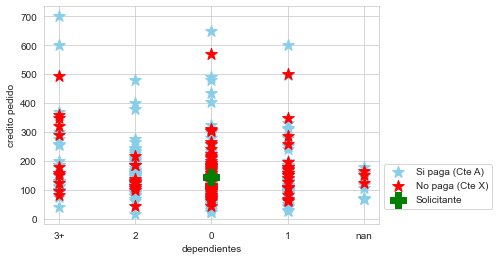

In [300]:
Dependientes=2 #Aquí estamos haciendo una pequeña prueba donde estamos gráficando dependientes vs crédito pedido y que nos arroje en la misma gráfica si es posible que alguien con x numero de dependientes nos diga si es posible que pagué o no
Credito_pedido=144
plt.scatter(prestamos_aceptados['Dependientes'].astype(str),prestamos_aceptados['Credito_pedido'], marker="*", s=150, color="skyblue", label="Si paga (Cte A)")
plt.scatter(prestamos_rechazados['Dependientes'].astype(str),prestamos_rechazados['Credito_pedido'], marker="*", s=150, color="red", label="No paga (Cte X)")
plt.scatter(Dependientes,Credito_pedido, marker="P", s=250, color="green", label="Solicitante")
plt.ylabel('credito pedido')
plt.xlabel('dependientes')
plt.legend(bbox_to_anchor=(1,0.3))
plt.show()

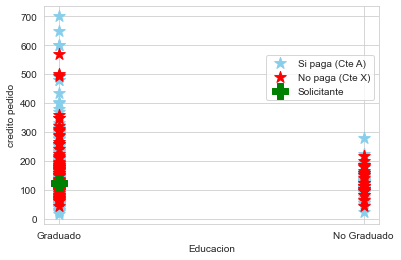

In [301]:
Educacion="Graduado"  #Aquí estamos haciendo una pequeña prueba donde estamos gráficando educacion vs crédito pedido y que nos arroje en la misma gráfica si es posible que alguien graduado o no nos diga si es posible que pagué o no
Credito_pedido=125

plt.scatter(prestamos_aceptados['Educacion'].astype(str),prestamos_aceptados['Credito_pedido'], marker="*", s=150, color="skyblue", label="Si paga (Cte A)")
plt.scatter(prestamos_rechazados['Educacion'].astype(str),prestamos_rechazados['Credito_pedido'], marker="*", s=150, color="red", label="No paga (Cte X)")
plt.scatter(Educacion,Credito_pedido, marker="P", s=250, color="green", label="Solicitante")
plt.ylabel('credito pedido')
plt.xlabel('Educacion')
plt.legend(bbox_to_anchor=(1,0.8))
plt.show()

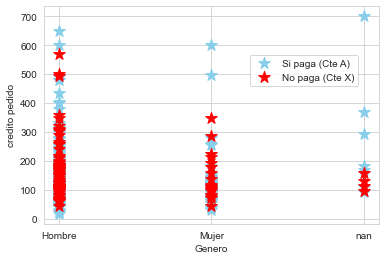

In [302]:
plt.scatter(prestamos_aceptados['Genero'].astype(str),prestamos_aceptados['Credito_pedido'], marker="*", s=150, color="skyblue", label="Si paga (Cte A)")
plt.scatter(prestamos_rechazados['Genero'].astype(str),prestamos_rechazados['Credito_pedido'], marker="*", s=150, color="red", label="No paga (Cte X)")
plt.ylabel('credito pedido')
plt.xlabel('Genero')
plt.legend(bbox_to_anchor=(.6,0.8))
plt.show()

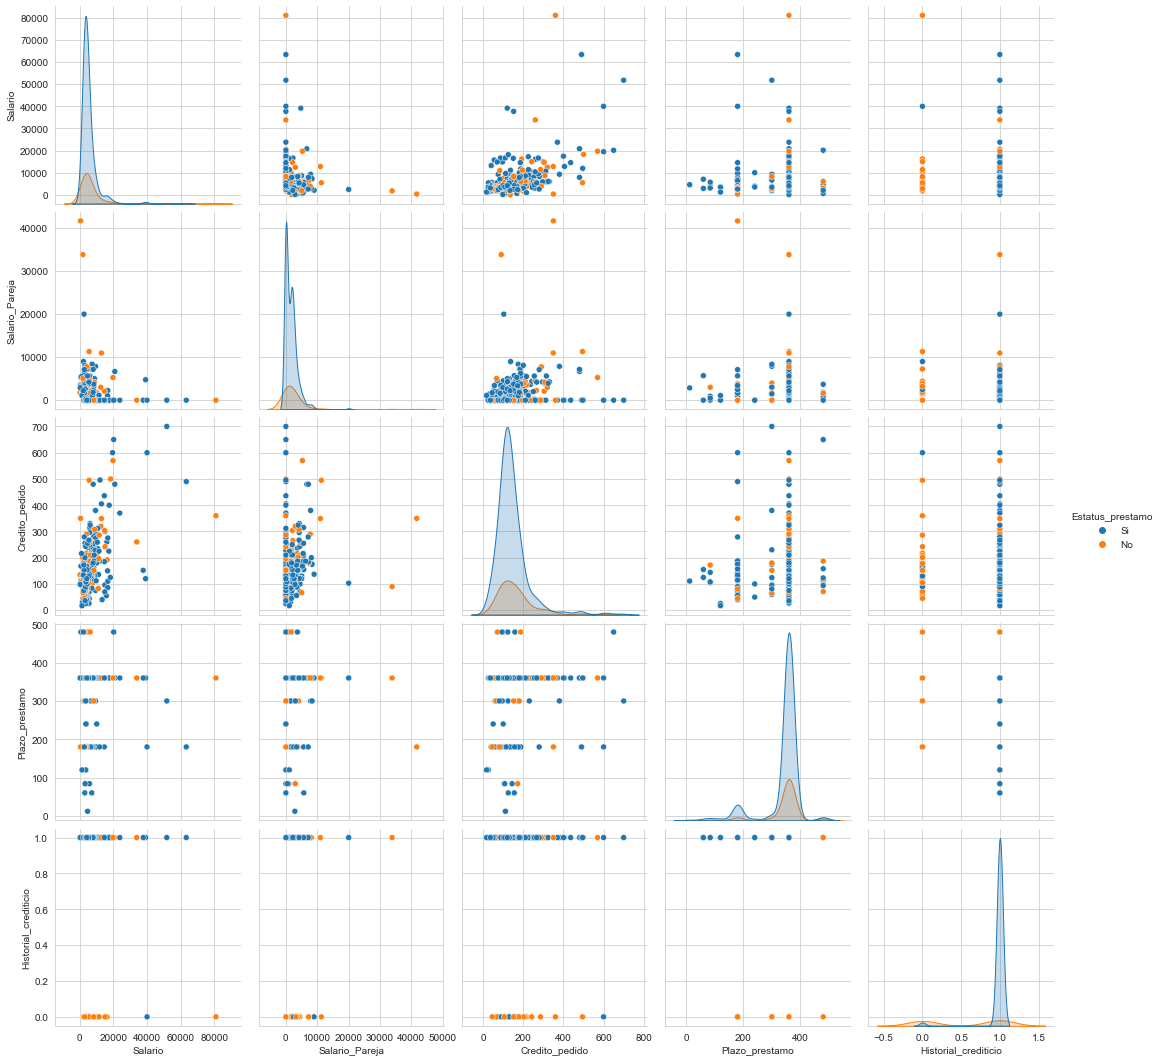

In [303]:
import seaborn as sns #Aquí tenemos una demostración de cada una de las gráficas de cada columna vs la columna de Estatus_credito para ver como influyen para que se les otorgue el crédito

datos = prospectos.drop("Unnamed: 0",axis=1)
sns.set_style("whitegrid")
#sns.set_style("red")
sns.pairplot(datos, hue="Estatus_prestamo",  height=3)
plt.show()

In [304]:
#La estandarización de datos haciendo que la media sea 0 y la varianza uno es buena práctica, especialmente para algoritmos tales como KNN el cual se basa en distancia de casos
#Esta parte se vio previamente donde hice la transformación uno a uno pero en esta parte fue más rápido porque tomamos toda la información y lo convertimos a un sólo "idioma" para poder trabajarlo directamente sin separar ni concatenar
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder = LabelEncoder()
prospectos.loc[:,['Asesor_asignado']] = prospectos['Asesor_asignado'].fillna('')
prospectos_nonan = prospectos.dropna().copy()

colums = ['Genero', 'Casado', 'Dependientes', 'Educacion', 'Trabaja_para_el',
                          'Salario', 'Salario_Pareja', 'Credito_pedido', 'Plazo_prestamo',
                          'Historial_crediticio', 'Area_vivienda', 'Asesor_asignado']
#print('columns: ', colums)
genero_encoder = LabelEncoder().fit(prospectos_nonan['Genero'])
prospectos_nonan.loc[:,['Genero']]= genero_encoder.transform(prospectos_nonan['Genero'])

casado_encoder = LabelEncoder().fit(prospectos_nonan['Casado'])
#print("es casado?", casado_encoder.transform(['Si','No']),prospectos_nonan['Casado'].unique())
prospectos_nonan.loc[:,['Casado']]= casado_encoder.transform(prospectos_nonan['Casado'])

dependientes_encoder = LabelEncoder().fit(prospectos_nonan['Dependientes'])
prospectos_nonan.loc[:,['Dependientes']]= dependientes_encoder.transform(prospectos_nonan['Dependientes'])

educacion_encoder = LabelEncoder().fit(prospectos_nonan['Educacion'])
prospectos_nonan.loc[:,['Educacion']]= educacion_encoder.transform(prospectos_nonan['Educacion'])

trabaja_encoder = LabelEncoder().fit(prospectos_nonan['Trabaja_para_el'])
prospectos_nonan.loc[:,['Trabaja_para_el']]= trabaja_encoder.transform(prospectos_nonan['Trabaja_para_el'])

historial_encoder = LabelEncoder().fit(prospectos_nonan['Historial_crediticio'])
prospectos_nonan.loc[:,['Historial_crediticio']]= historial_encoder.transform(prospectos_nonan['Historial_crediticio'])

area_encoder = LabelEncoder().fit(prospectos_nonan['Area_vivienda'])
prospectos_nonan.loc[:,['Area_vivienda']]= area_encoder.transform(prospectos_nonan['Area_vivienda'])

estatus_encoder = LabelEncoder().fit(prospectos_nonan['Estatus_prestamo'])
prospectos_nonan.loc[:,['Estatus_prestamo']]= estatus_encoder.transform(prospectos_nonan['Estatus_prestamo'])

asesoras_encoder = LabelEncoder().fit(prospectos_nonan['Asesor_asignado'])
prospectos_nonan.loc[:,['Asesor_asignado']]= asesoras_encoder.transform(prospectos_nonan['Asesor_asignado'])
print(prospectos_nonan.head())

   Unnamed: 0       Fecha_registro       Fecha_contacto        Id  Genero  \
0           0  02/26/2019 11:00 AM  02/27/2019 12:03 PM  LP002519       0   
2           2  02/27/2019 08:18 AM  02/28/2019 02:27 PM  LP001151       1   
4           4  02/26/2019 07:40 AM  02/27/2019 04:35 PM  LP002894       1   
5           5  02/27/2019 08:07 AM  02/28/2019 12:42 PM  LP001404       1   
6           6  02/27/2019 10:19 AM  02/28/2019 05:26 PM  LP001112       1   

   Casado  Dependientes  Educacion  Trabaja_para_el  Salario  Salario_Pareja  \
0       1             3          0                0     4691             0.0   
2       0             0          0                0     4000          2275.0   
4       1             0          0                0     3166             0.0   
5       1             0          0                0     3167          2283.0   
6       1             0          0                0     3667          1459.0   

   Credito_pedido  Plazo_prestamo  Historial_crediticio 

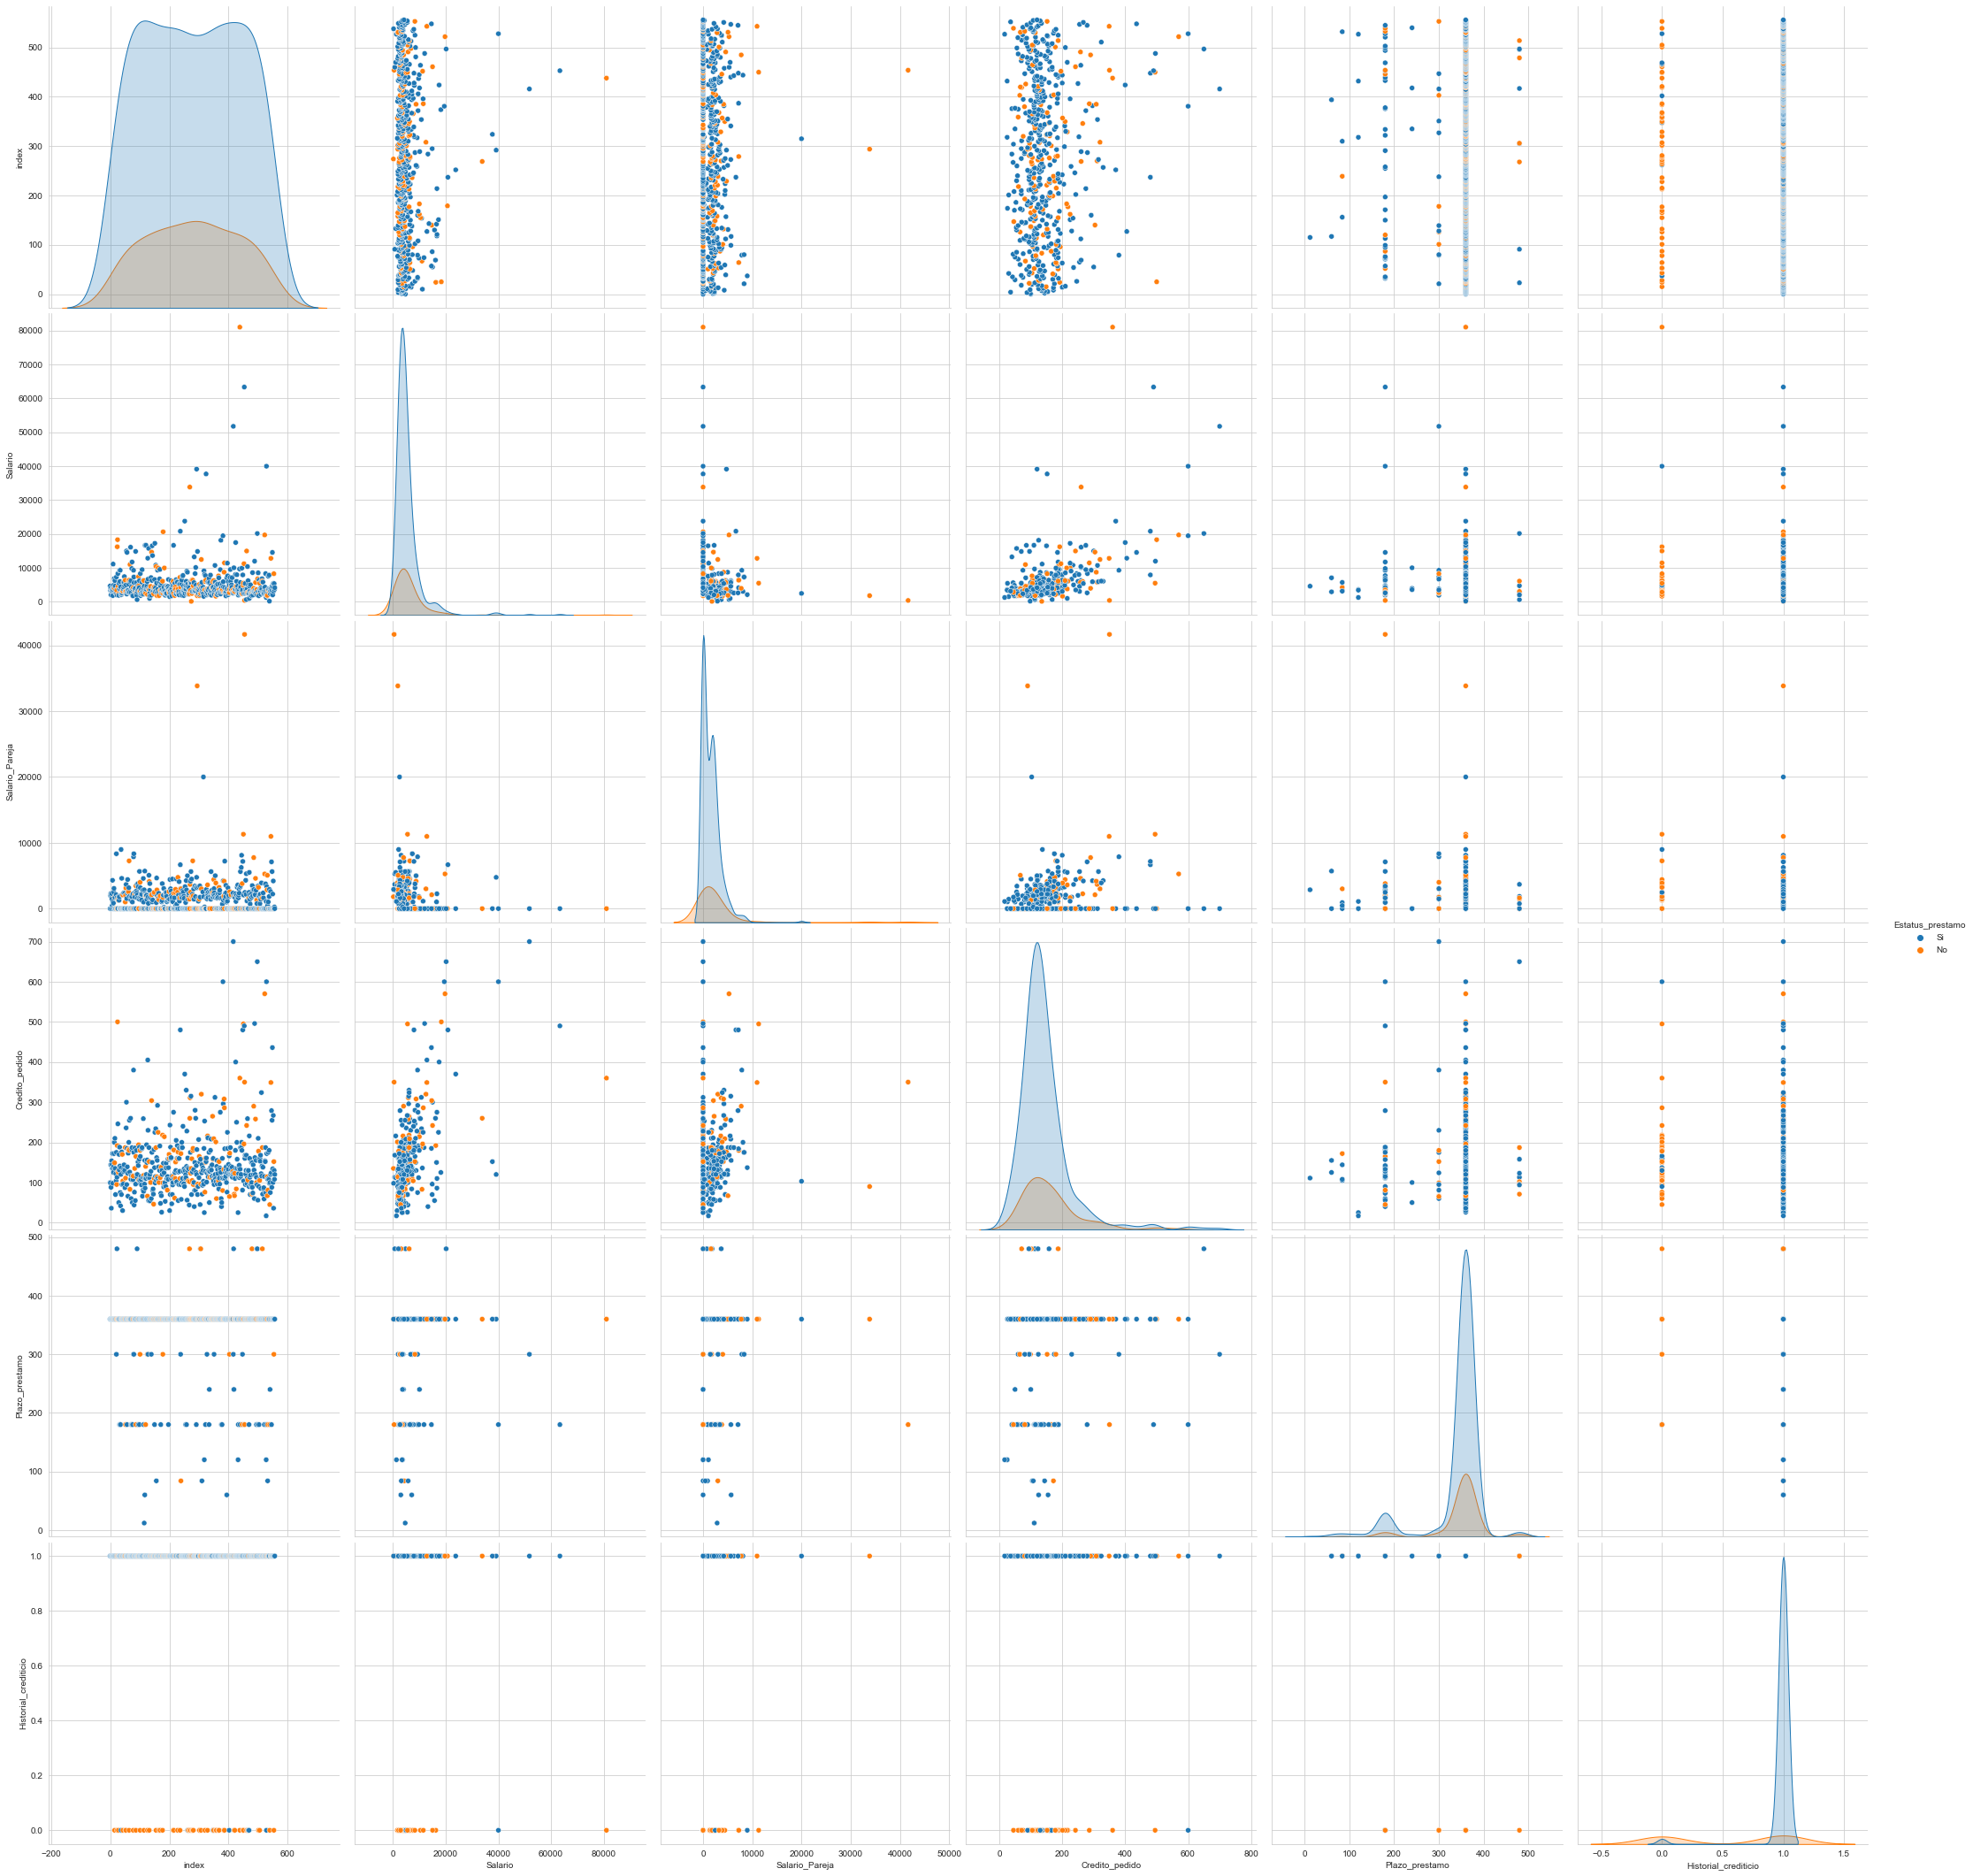

In [305]:
import seaborn as sns

datos = prospectos.reset_index().drop("Unnamed: 0",axis=1)
sns.set_style("whitegrid")
sns.pairplot(datos, hue="Estatus_prestamo",  height=5)
plt.show()

In [306]:
prospectos_est = prospectos_nonan.dropna()
print(prospectos_est.head(),colums)
X = prospectos_est[colums].values  #.astype(float)
X = preprocessing.MinMaxScaler().fit(X).transform(X.astype(float))
print(X[1])
y=prospectos_est['Estatus_prestamo']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 4
#Entrenar el Modelo y Predecir  
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
print(yhat[0:1])
print('test', X_test[:1])

from sklearn.linear_model import LinearRegression

   Unnamed: 0       Fecha_registro       Fecha_contacto        Id  Genero  \
0           0  02/26/2019 11:00 AM  02/27/2019 12:03 PM  LP002519       0   
2           2  02/27/2019 08:18 AM  02/28/2019 02:27 PM  LP001151       1   
4           4  02/26/2019 07:40 AM  02/27/2019 04:35 PM  LP002894       1   
5           5  02/27/2019 08:07 AM  02/28/2019 12:42 PM  LP001404       1   
6           6  02/27/2019 10:19 AM  02/28/2019 05:26 PM  LP001112       1   

   Casado  Dependientes  Educacion  Trabaja_para_el  Salario  Salario_Pareja  \
0       1             3          0                0     4691             0.0   
2       0             0          0                0     4000          2275.0   
4       1             0          0                0     3166             0.0   
5       1             0          0                0     3167          2283.0   
6       1             0          0                0     3667          1459.0   

   Credito_pedido  Plazo_prestamo  Historial_crediticio 

In [307]:
#Dividimos la muestra en los conjuntos de datos para el entrenamiento y para la prueba de exactitud

from sklearn import metrics
print("Entrenar el set de Certeza: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Probar el set de Certeza: ", metrics.accuracy_score(y_test, yhat))

Entrenar el set de Certeza:  0.9454022988505747
Probar el set de Certeza:  0.9080459770114943


In [308]:
print(prospectos)

     Unnamed: 0       Fecha_registro       Fecha_contacto        Id  Genero  \
0             0  02/26/2019 11:00 AM  02/27/2019 12:03 PM  LP002519  Hombre   
1             1  02/27/2019 02:52 PM  02/26/2019 07:43 AM  LP001280  Hombre   
2             2  02/27/2019 08:18 AM  02/28/2019 02:27 PM  LP001151   Mujer   
3             3  02/28/2019 10:00 AM  03/01/2019 12:57 PM  LP002036  Hombre   
4             4  02/26/2019 07:40 AM  02/27/2019 04:35 PM  LP002894   Mujer   
..          ...                  ...                  ...       ...     ...   
552         552  02/27/2019 08:22 AM  02/28/2019 01:04 PM  LP002894   Mujer   
553         553  02/27/2019 10:40 AM  02/28/2019 01:10 PM  LP002315  Hombre   
554         554  02/28/2019 10:32 AM  03/01/2019 02:20 PM  LP002225  Hombre   
555         555  02/26/2019 09:48 AM  02/27/2019 01:28 PM  LP002807  Hombre   
556         556  02/26/2019 11:18 AM  02/27/2019 04:14 PM  LP001664  Hombre   

    Casado Dependientes    Educacion Trabaja_para_e

In [309]:
cte = pd.array(['Hombre','No','0','No Graduado','No',3948,0,149,360,'0','Semiurbana',''])

In [310]:
cte = np.array([[
    genero_encoder.transform([cte[0]]), 
    casado_encoder.transform([cte[1]]), 
    dependientes_encoder.transform([cte[2]]), 
    educacion_encoder.transform([cte[3]]), 
    trabaja_encoder.transform([cte[4]]),
    cte[5],
    cte[6],
    cte[7],
    cte[8],
    historial_encoder.transform([int(cte[9])]),
    area_encoder.transform([cte[10]]), 
   asesoras_encoder.transform([cte[11]]) 
]], dtype=object)
cte.shape = (1, 12)
print(np.array(cte,).shape)



(1, 12)


In [311]:
cte_predict = neigh.predict(cte)
print(cte_predict[0:1])
print(estatus_encoder.inverse_transform(cte_predict))

[1]
['Si']


In [312]:
#¿Crees que sea una buena idea? ¿ Por qué? R= Actualmente la tecnología nos ayuda mucho a poder decidir o tomar decisiones, por lo que siempre es una buena idea tener un modelo que nos facilite las decisiones
#Si la respuesta fue sí, ¿qué tipo de probema es según los datos que tienes? (Supervisado o No Supervisado R= Es supervisado, ya que partimos de datos etiquetados previamente, ya que los datos que tenemos son una guía para llegar a tener conclusiones
#¿Cómo sabes que es un buen modelo? R=Knn es un algortirmo para aprendizaje supervisado ya que apartir de un conjunto de datos podemos determinar en este caso puede predecir si se le otorga o no el prestamo.
